### import das libs principais

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

### Rodando a base

In [2]:
data_frame = pd.read_excel("base/dados_tratados_heart.xlsx", "heart")

### Primeiros Dados

In [3]:
data_frame.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,2,172,0,0,1,0
1,49,0,3,160,180,0,2,156,0,1,2,1
2,37,1,2,130,283,0,3,98,0,0,1,0
3,48,0,1,138,214,0,2,108,1,15,2,1
4,54,1,3,150,195,0,2,122,0,0,1,0


### Ultimos dados

In [4]:
data_frame.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,4,110,264,0,2,132,0,12,2,1
914,68,1,1,144,193,1,2,141,0,34,2,1
915,57,1,1,130,131,0,2,115,1,12,2,1
916,57,0,2,130,236,0,1,174,0,0,2,1
917,38,1,3,138,175,0,2,173,0,0,1,0


### Informações Gerais

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int64
 11  HeartDisease    918 non-null    int64
dtypes: int64(12)
memory usage: 86.2 KB


### Análise Descritiva

In [6]:
data_frame.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.781046,132.396514,198.799564,0.233115,1.989107,136.809368,0.404139,5.393246,1.638344,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,8.774345,0.607056,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,-26.000000,1.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,0.000000,2.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,223.000000,0.000000,2.000000,138.000000,0.000000,1.000000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,8.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,3.000000,202.000000,1.000000,62.000000,3.000000,1.000000


### Alguns gráficos

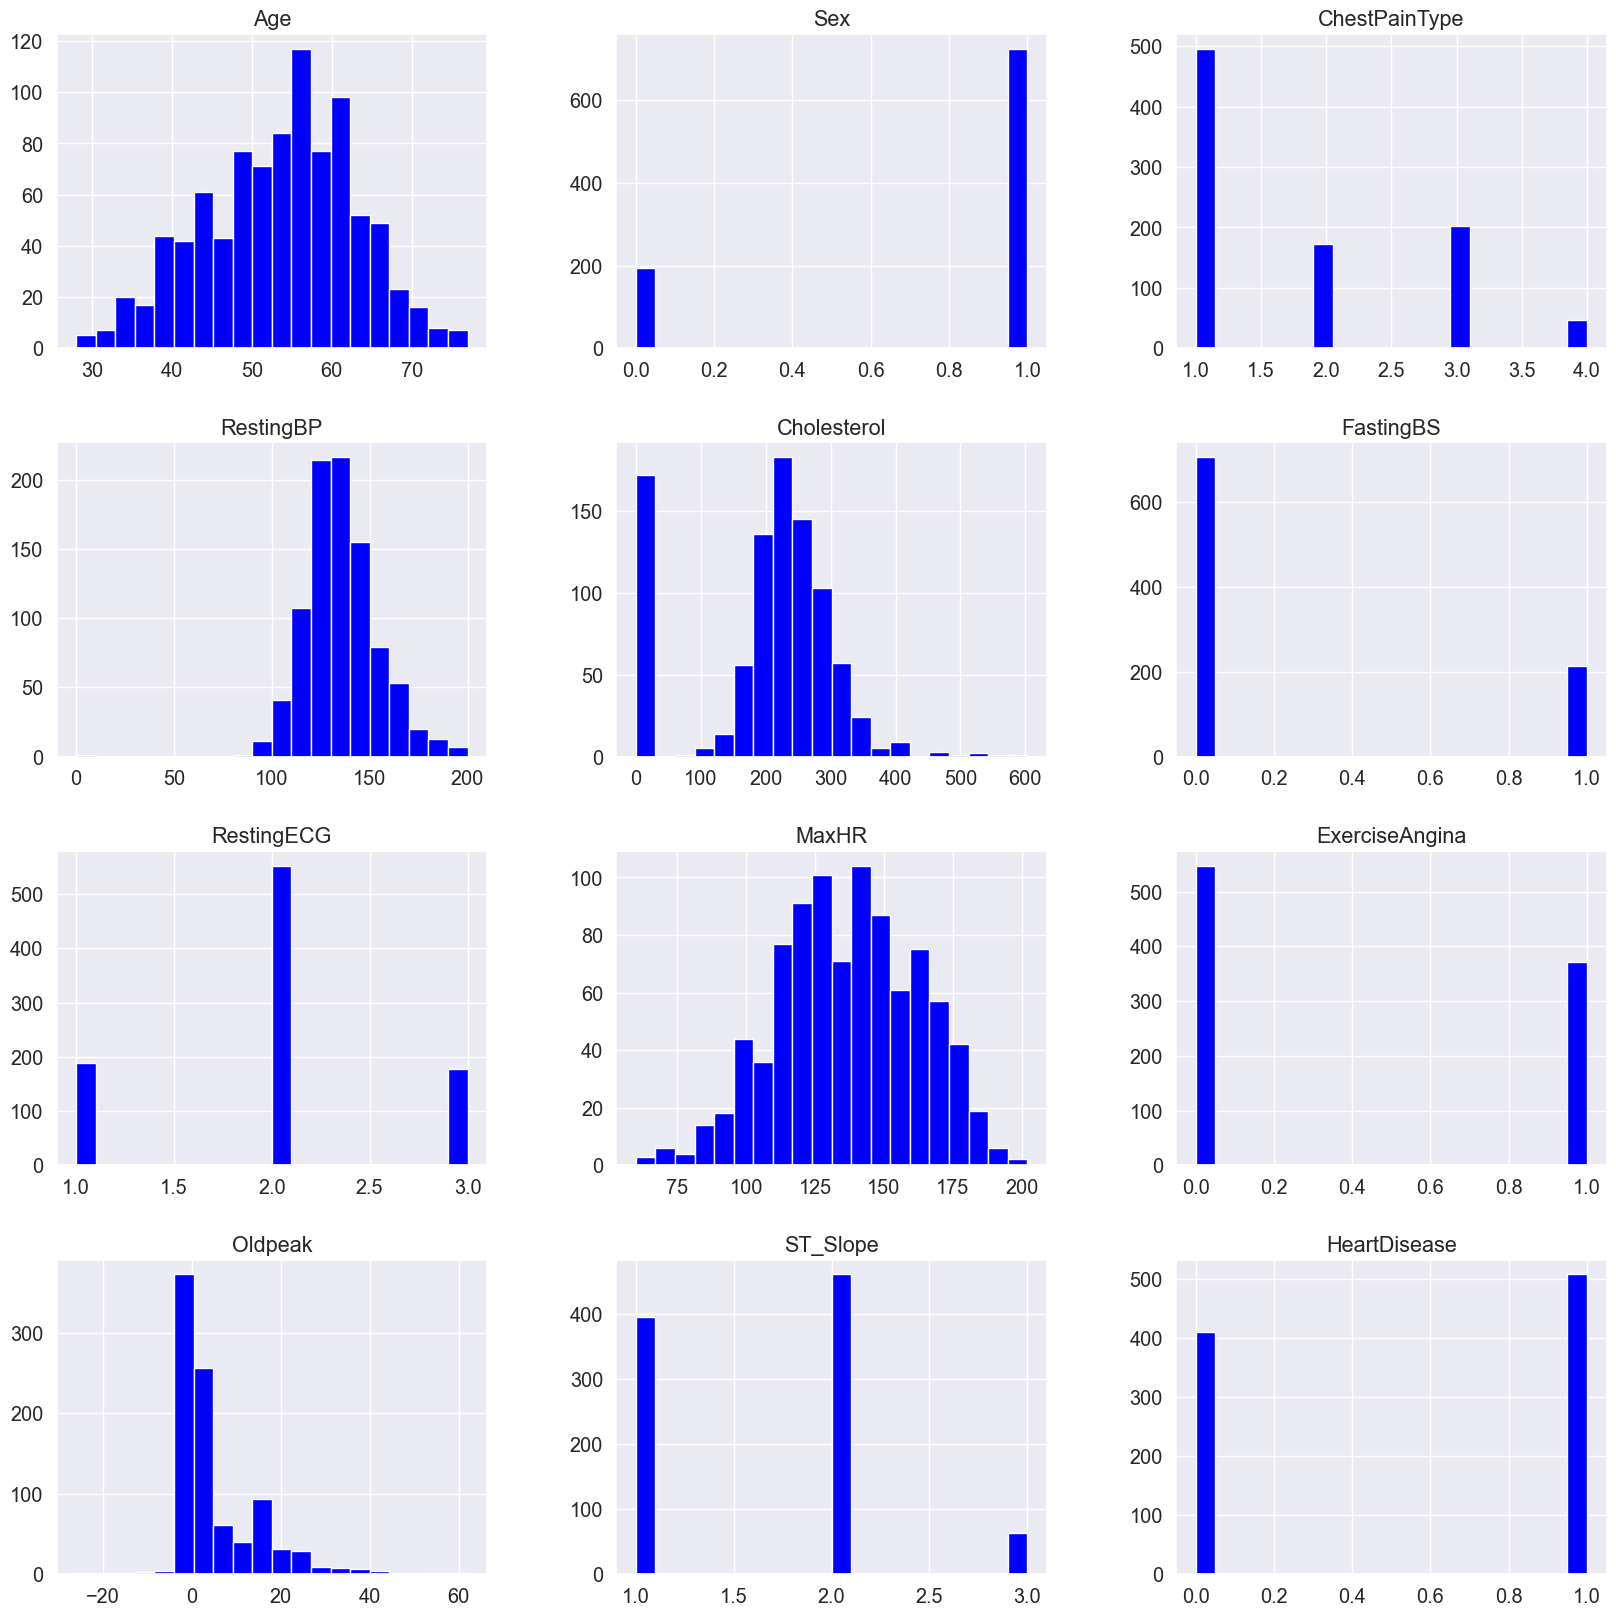

In [7]:
snb.set_theme(font_scale=1.3, rc={'figure.figsize': (20, 20)})
eixo = data_frame.hist(bins=20, color='blue')

<Axes: xlabel='HeartDisease', ylabel='Age'>

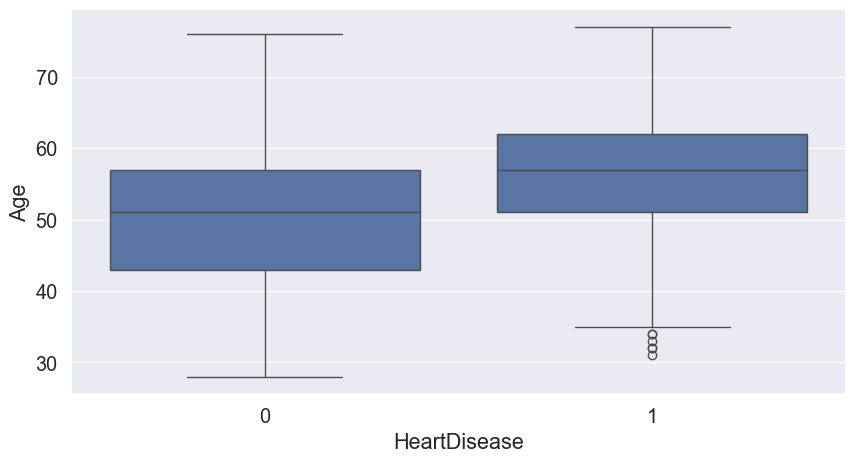

In [8]:
plt.figure(figsize=(10, 5))
snb.boxplot(data=data_frame, x='HeartDisease', y='Age')

### Aplicando modelo

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as treinoteste

x_caracteristicas = data_frame.iloc[:, :11].values
y_previsor = data_frame.iloc[:, 11:12].values

* Gerando variáveis de treinamento

In [10]:
x_treino, x_teste, y_treino, y_teste = treinoteste(x_caracteristicas, y_previsor, test_size=0.6)

* Treinando modelo

In [11]:
svm_model = SVC(kernel='linear', C=0.1)
svm_model.fit(x_treino, y_treino)

d:\Renan\Projetos\python\marchine_learning_project\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* Realizamdo previsões

In [12]:
previssoes = svm_model.predict(x_teste)

In [13]:
previssoes

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

### Avaliando modelo

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste, previssoes)

array([[200,  55],
       [ 37, 259]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previssoes))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       255
           1       0.82      0.88      0.85       296

    accuracy                           0.83       551
   macro avg       0.83      0.83      0.83       551
weighted avg       0.83      0.83      0.83       551



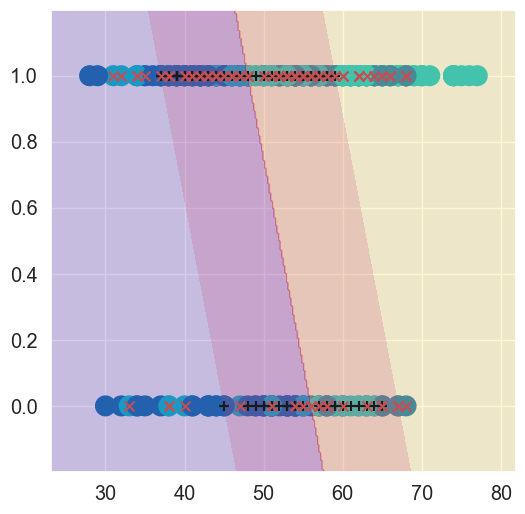

In [ ]:
from ISLP.svm import plot as plot_svm
from sklearn.svm import SVC

# Selecionando apenas 2 features para visualização (primeiras 2 colunas)
x_treino_2d = x_treino[:, [0, 10]]  
y_treino_flat = y_treino.ravel()   # Convertendo para 1D

# Criando um modelo SVM específico para 2D
svm_model_2d = SVC(kernel='linear', C=0.1)
svm_model_2d.fit(x_treino_2d, y_treino_flat)

fig, ax = plt.subplots(figsize=(6, 6))
plot_svm(x_treino_2d,
         y_treino_flat,
         svm_model_2d,
         ax=ax)

### Comparando diferentes valores de C

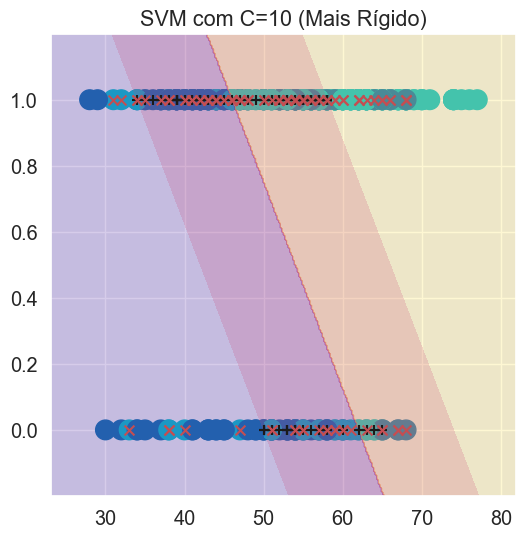

In [18]:
# Testando com C = 10 (mais rígido)
svm_model_rigido = SVC(kernel='linear', C=10)
svm_model_rigido.fit(x_treino_2d, y_treino_flat)

fig, ax = plt.subplots(figsize=(6, 6))
plot_svm(x_treino_2d, y_treino_flat, svm_model_rigido, ax=ax)
plt.title('SVM com C=10 (Mais Rígido)')
plt.show()

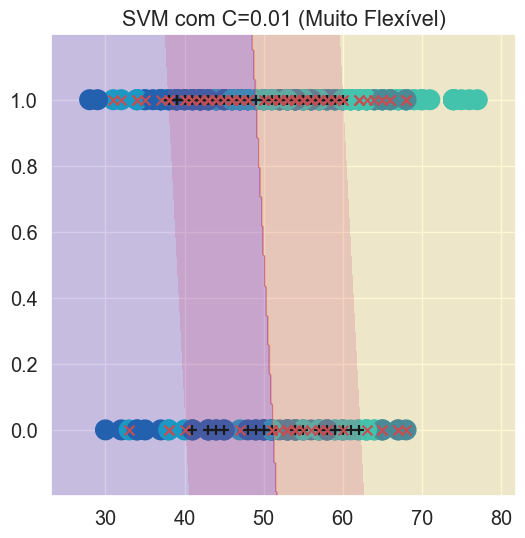

In [19]:
# Testando com C = 0.01 (muito flexível)
svm_model_flexivel = SVC(kernel='linear', C=0.01)
svm_model_flexivel.fit(x_treino_2d, y_treino_flat)

fig, ax = plt.subplots(figsize=(6, 6))
plot_svm(x_treino_2d, y_treino_flat, svm_model_flexivel, ax=ax)
plt.title('SVM com C=0.01 (Muito Flexível)')
plt.show()

### Explicação dos Símbolos

**Legenda dos gráficos SVM:**
- **Círculos azuis/verdes**: Pontos de dados das duas classes
- **Símbolos + (pretos)**: Vetores de suporte que **violam a margem** (estão do lado "errado")
- **Símbolos × (vermelhos)**: Vetores de suporte **mal classificados**
- **Linha diagonal**: Fronteira de decisão
- **Regiões coloridas**: Zonas de classificação

**Por que alguns vetores cruzam a linha:**
1. **C baixo (0.1, 0.01)**: Permite mais violações para ter margem maior → mais generalização
2. **C alto (10)**: Menos violações, margem menor → mais precisão no treino
3. **Dados não-separáveis**: Com apenas 2 features, as classes se sobrepõem